# ライブラリ編（OpenCV/scikit-learnによる手書き文字画像認識）

## 研修の目的

* OpenCVによる画像処理/画像認識の手法を学ぶ  
* scikit-learnを使用した手書き文字画像認識の演習を通じ、AIによる画像認識機能の実装方法を学ぶ

## 研修の流れ
* 座学→課題→座学→課題→（…）→実践課題  
* 研修の進行に合わせて、コードが書いてあるセルを実行すること。

## 環境準備
* 下記のセルを実行し、環境の準備を実行する。

In [2]:
# Google Driveをマウントさせ、成果物を保存できるようにする。
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'  # 以降、このフォルダを指定することで、成果物の保存可能に。
os.symlink('/content/mnt/My Drive', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/mnt



## 使用するライブラリ

* [OpenCV](https://docs.opencv.org/2.4/modules/refman.html)
 - 画像認識に必要なライブラリ  
   顔認識などに関してはこのライブラリの利用だけで実装が可能。  
   主な使用用途は[リンク先](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_tutorials.html)の通り。  
   その他、画像処理に使用するライブラリとして[dlib](http://dlib.net/)があるが、本研修ではOpenCVを使用する。

* [scikit-learn](https://scikit-learn.org/stable/modules/classes.html)
 - 機械学習に必要なライブラリ  
   モデルの学習やパラメータのチューニングに必要なモジュールのほか、サンプルのデータセットも含まれている。  
   今回はSVNとサンプルのデータセットを使用し、手書き文字画像の識別を実施するモデルを作成する。

* matplotlib 
 - グラフの描画などに使用するライブラリ
 

In [3]:
# 使用するライブラリをインポートする
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import math
import pickle

* 研修で使用する画像のパス

In [4]:
path = '/content/kadaigazou/lena.png'

## 1.画像処理

 - 課題1 OpenCVを使用して、画像を読み込む
  - 1-1. 画像を準備し、Google Driveのcolaboreatoryにマウントしたディレクトリに保存しよう
  - 1-2.保存したディレクトリからOpenCVを使用し、画像をコンソール上で表示してみよう
  


* 課題1 解答欄  
足りない箇所を埋めて、セルを実行すること。

In [5]:
drive.mount('/content/gdrive')
!unzip 'gdrive/Shared drives/AI開発道場/ライブラリ編/opencv/kadaigazou.zip'
!ls -l /content/kadaigazou/lena.png

Mounted at /content/gdrive
Archive:  gdrive/Shared drives/AI開発道場/ライブラリ編/opencv/kadaigazou.zip
   creating: kadaigazou/model/
   creating: kadaigazou/lena/
  inflating: kadaigazou/image0.jpeg  
   creating: kadaigazou/cascade/nega/
   creating: kadaigazou/cascade/cascade/
  inflating: kadaigazou/lena.png     
  inflating: kadaigazou/haarcascade_frontalface_default.xml  
  inflating: kadaigazou/img_m.jpg    
  inflating: kadaigazou/cascade/sample_cascade/cascade_sample.xml  
  inflating: kadaigazou/cascade/sample_cascade/cascade_sample2.xml  
  inflating: kadaigazou/cascade/sample_cascade/cascade.xml  
  inflating: kadaigazou/cascade/meishi/image9.jpeg  
  inflating: kadaigazou/cascade/meishi/image3.jpeg  
  inflating: kadaigazou/cascade/meishi/image6.jpeg  
  inflating: kadaigazou/cascade/one_pic/meishi2.png  
  inflating: kadaigazou/cascade/meishi/image1.jpeg  
  inflating: kadaigazou/cascade/meishi/image17.jpeg  
  inflating: kadaigazou/cascade/meishi/image7.jpeg  
  inflating: kadaig

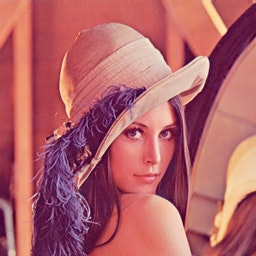

In [6]:
# マウントしたnotebook配下に画像を載せて、path_kadaiを埋める
path_kadai = '/content/kadaigazou/lena.png'
img = cv2.imread(path_kadai)
# 結果を出力
cv2_imshow(img)

* 画像の読み込み
 - cv2.imread(path)
* 画像の表示
 - cv2_imshow(画像のデータ)

※これ以降の前提:img = cv.imread('任意の画像')で任意の画像のデータを取得したものとする


- 色空間の変換
 - cv2.cvtColor(img, メソッド)
   - 指定されたメソッドで色空間を変換した画像を出力する。  
   例えば、cv2.COLOR_BGR2HSVならBGRでの表現から「色相(Hue)」「彩度(Saturation)」「明度(Value)」で表現された色空間に変換する。


- 二値化
 - cv2.threshold(img,thresh,maxval,type)
   - 画像としきい値が返却される
   - 変数について  
     img：入力画像(グレイスケール)  
     thresh：しきい値  
     maxval：しきい値以上の値を持つ値に対して割り当てる値を指定  
     type：二値化する際の手法  
     　　　THRESH_BINARY_INVの場合しきい値よりも大きな値であれば0、それ以外はmaxvalの値にする。  
     　　　その他よく使われるものとしてTHRESH_OTSUなどがあるが、細かい解説などについては本研修では割愛。


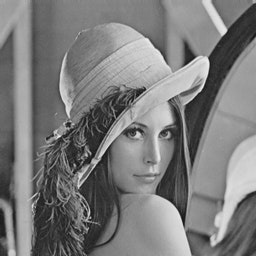

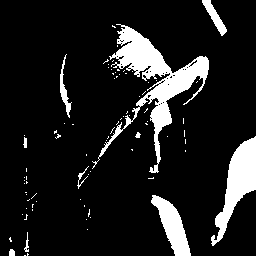

In [7]:
# グレースケール変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 二値化
retval, img_binary = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY)
# 結果を出力
cv2_imshow(img_gray)
cv2_imshow(img_binary)

* フィルタ処理について  
詳細は[ここ](http://opencv.jp/opencv-2svn/cpp/imgproc_image_filtering.html#cv-blur)を参照すること。
* アフィン変換  
アフィン変換とは、平行移動と線形変換を組み合わせた変換のこと。
 * cv2.getRotationMatrix2D(center, angle, scale, mapMatrix)
   * 画像のアフィン変換行列を求める
 * cv2.warpAffine(src, dst, mapMatrix, flags=CV_INTER_LINEAR+CV_WARP_FILL_OUTLIERS, fillval=(0, 0, 0, 0))
   * アフィン変換行列を使用し、実際に変換する
* エッジ検出  
特徴検出や特徴抽出 の一種であり、デジタル画像の明るさが不連続に変化している箇所を特定するアルゴリズムのこと
   *  cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
     * エッジ検出後の画像が出力される

* ぼかし  
  OpenCVでは、下記の4つの方法で画像のぼかし（平滑化）を実行することが可能。
  * 平均  
    cv2.blur()
    * 箱型フィルタを使用し、範囲内にある全画素の画素値の平均を使用して平滑化を実施する。
  * ガウシアンフィルタ  
    cv2.getGaussianKernel() 
   * 注目画素との距離に応じて重みを変えて平滑化を実施する。 
  * 中央値フィルタ  
    cv2.medianBlur()
   * 全画素の中央値を計算し、平滑化を実施する。  
     ごま塩のようなノイズに対して効果的    
  * バイラテラルフィルタ  
    cv2.bilateralFilter() 
   * エッジを保存しつつ、画像の平滑化を実施する。  
      ガウシアンフィルタと違い、エッジが保たれた状態で平滑化をすることが可能。

* 下記のセルを実行し、出力を確認してください。
  * 余裕があれば、ガウシアンフィルタ以外の平滑化も実施してみましょう。

256 256 3
[[  0.35355339   0.35355339  37.49033201]
 [ -0.35355339   0.35355339 128.        ]]


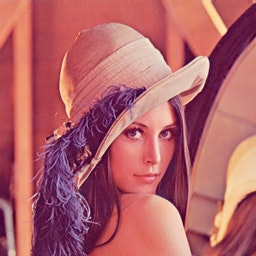

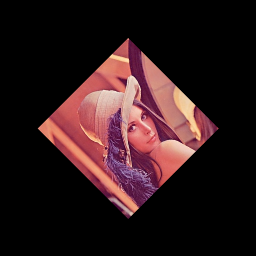

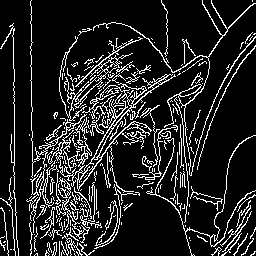

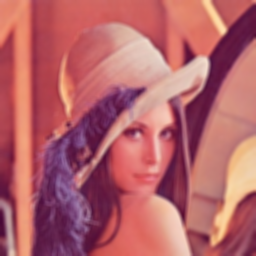

In [8]:
# サンプルコード
img = cv2.imread(path)
h, w, c = img.shape
print(h, w, c)
# アフィン変換
#変換に使用する
mat = cv2.getRotationMatrix2D((w / 2, h / 2), 45, 0.5)
print(mat)
img_affine = cv2.warpAffine(img, mat, (w, h))
# エッジ検出
 # グレースケールに変換
gray_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_edge = cv2.Canny(gray_img, 50, 110)
# ぼかし
img_bokashi = cv2.GaussianBlur(img, (5, 5), 3)

# print
cv2_imshow(img)
cv2_imshow(img_affine)
cv2_imshow(img_edge)
cv2_imshow(img_bokashi)

- 画像のリサイズ
 - cv2.resize(img , (int(img.shape[1] * 倍率), int(img.shape[0] * 倍率,interpolation='拡大、縮小の手法')))  
 openCVでは画像をnumpy配列として扱うため、numpyで配列を扱う場合と同様に扱うことが可能。  

- 画像の切り取り
 - img = img[130:280, 100:250]  
numpy配列として扱っているため、スライスで指定することで実施可能。

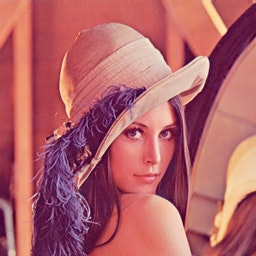

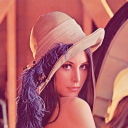

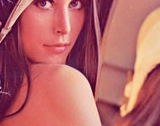

In [10]:
img = cv2.imread(path)
img_resize = cv2.resize(img , (int(img.shape[1] * 0.5), int(img.shape[0] * 0.5)))
img_cut = img[130:280, 90:250]

cv2_imshow(img)
cv2_imshow(img_resize)
cv2_imshow(img_cut)

- 課題2 OpenCVを使用し、基本的な画像処理を実際にやってみよう
 - 2-1. 画像をモノクロにしてみよう
 - 2-2. 画像の面積を元の画像の1/4に変えてみよう
 - 2-3. 画像の二値化を試してみよう
   - 2-1でモノクロにした画像を使用する
   - 閾値は100とする（余裕があったら、閾値を変化させて実行すること。）

* 解答欄
 - ToDoを埋めて、セルを実行した時に課題の指示通りの画像がコンソールに表示されるようにすること。


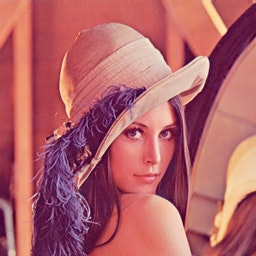

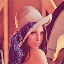

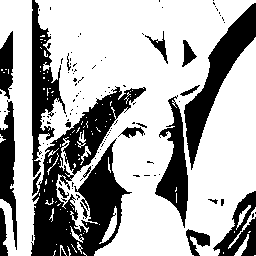

In [11]:
img = cv2.imread(path)
# ToDo:課題2-1
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ToDo:課題2-2
img_resize = cv2.resize(img , (int(img.shape[0] * 0.25), int(img.shape[1] * 0.25)))
 # (img , (int(img.shape[0] * 倍率), int(img.shape[1] * 倍率,interpolation = INTER_LINEAR)) 
 # interpolationとは、リサイズのモード、デフォルトはINTER_LINEAR：bilinear（双線型）

# ToDo:課題2-3
retval, img_binary = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

# 結果を出力
cv2_imshow(img)
cv2_imshow(img_resize)
cv2_imshow(img_binary)

## 2.画像認識
 - 画像認識とは  
 画像の中にいったい何が写っているのか、コンピューターや機械などが判別する技術


* 物体検出
 - 予め学習されたカスケード分類器を使用することで、人物の顔やナンバープレートなどを検出することが可能。
 - cascade = cv2.CascadeClassifier('分類器のパス')で使用する分類器を指定  
   cascade.[defaultMultiScale()](http://opencv.jp/opencv-2.1/cpp/object_detection.html)で検出。


* カスケード分類器は[公式のgithub](https://github.com/opencv/opencv)から取得が可能。  
自作することも可能ですが、今回は研修資料としてフォルダに格納してあるものを使用してください。

* 研修で使用するカスケード分類器のパス

In [12]:
!ls -l /content/kadaigazou

total 9392
drwxr-xr-x 7 root root    4096 Jul 29 09:19 cascade
-rw-r--r-- 1 root root 1254733 May 14 22:38 haarcascade_frontalface_default.xml
-rw-r--r-- 1 root root   14551 May 21 23:16 image0.jpeg
-rw-r--r-- 1 root root 2830990 May 26 23:49 img_m.jpg
drwxr-xr-x 2 root root    4096 Jun  4 21:03 lena
-rw-r--r-- 1 root root   22713 Mar 18 23:56 lena.png
drwxr-xr-x 2 root root    4096 Jun  4 21:03 model
-rw-r--r-- 1 root root 5470680 Mar 25 21:24 tegaki8.jpeg


In [13]:
cascade = cv2.CascadeClassifier('/content/kadaigazou/haarcascade_frontalface_default.xml')

* 分類器の使用例

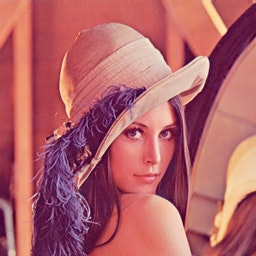

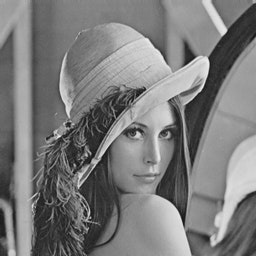

[[109 102  85  85]]


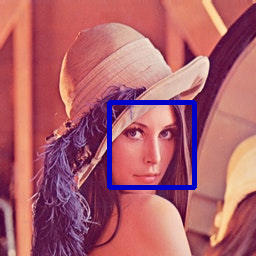

In [14]:
img = cv2.imread(path)
cv2_imshow(img)
# 分類器で検出できるよう、画像の色空間を変換。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
print(face)

# 検出した領域を矩形で囲む
for (x, y, w, h) in face:
  cv2.rectangle(img, (x, y), (x + w, y + h), (200,0,0), 3)

cv2_imshow(img)

* 課題2（続き）
 - 2-4. 画像の女性の顔を検出してみよう
   - matplotlibでも画像の表示ができます。  
     画像のどのあたりで顔が検出されるかわかるように、 matplotlibで出力しましょう。  
   - matplotlibで出力する際は色空間をBGRからRGBに変える必要があります。

* 解答欄

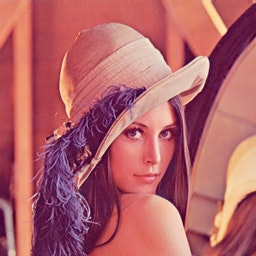

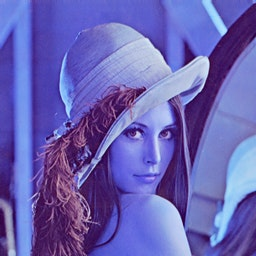

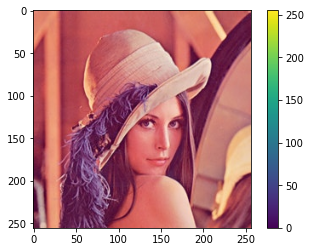

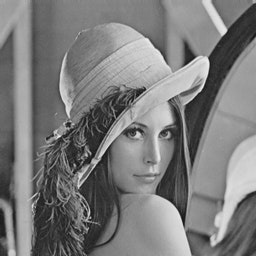

[[109 102  85  85]]


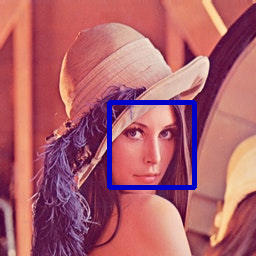

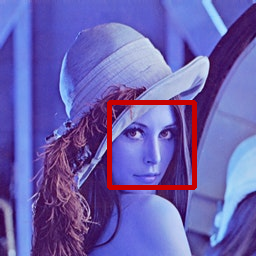

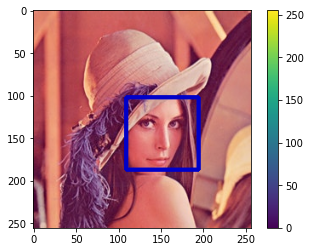

In [15]:
# 解答欄
img = cv2.imread(path)
cv2_imshow(img)

# 2-4
# ToDo:OpenCV上はBGRフォーマットだが、matplotで表示するためにRGBフォーマットに変換する
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img2)

# matplotで表示
plt.figure()
plt.imshow(img2)
# 値が分かるようにカラーバーを表示する
plt.colorbar()
plt.show()

# ToDo:分類器で検出できるよう、画像の色空間を変換する。
# ToDO:分類器を使い、顔の場所のデータを抽出する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
print(face)

# ToDo: 検出した領域を矩形で囲む
# ToDo: 顔を短形で囲ってある画像をmatplotlibで出力する
# 検出した領域を矩形で囲む
for (x, y, w, h) in face:
  cv2.rectangle(img, (x, y), (x + w, y + h), (200,0,0), 3)

cv2_imshow(img)

# OpenCV上はBGRフォーマットだが、matplotで表示するためにRGBフォーマットに変換する
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img3)
# matplotで表示
plt.figure()
plt.imshow(img3)
# 値が分かるようにカラーバーを表示する
plt.colorbar()
plt.show()

* [【参考】カスケード分類器の作成方法](https://docs.opencv.org/master/dc/d88/tutorial_traincascade.html)


- 【追加課題】※OpenCV編演習課題を実施してから実施すること。
 - 2-5. 
   - 1 DCSのロゴの検出が可能なカスケード分類器を作成してみよう  
  カスケード分類器の作成に必要なファイルに関しては、研修用ファイルに格納済み。
   - 2. 作成したカスケード分類器を使用して、DCSのロゴを抽出してみよう  
  抽出用の画像に関しては、自分の名刺の画像が写っているものとそうでないものをそれぞれ使用し、名刺のロゴ部分を検出できたもの/できないものそれぞれコンソールに出力すること。

 -  2-6. 学習のパラメータを変更してカスケード分類器を作り直してみよう

 -  2-7. 学習用のデータを追加して、カスケード分類器の精度を上げてみよう
   - 学習用のサンプル画像のリストについては、posi.txtを参考にすること。

In [ ]:
#2追加課題解答（作成中）
# 別資料にて展開予定



### OpenCV編演習課題
* 自動で顔にモザイクをつけるメソッドを作成しよう
- 下記の要件を満たすこと
 - 受け取ったパスから画像を読み込み、モザイク処理をして画面出力すること。
 - 処理が正常に行われたことがわかるように、処理前と処理後の画像を出力すること。
 - 分類器による抽出にはdetectMultiScaleメソッドを使用すること
- モザイク処理については、下記のメソッドを準備してあるので、活用すること。
  - 受け取った画像を縮小拡大するメソッド 
        def mosaic(src, ratio=0.1):  
            small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
            return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

  - 指定したエリアをモザイク対象範囲として取得するメソッド
        def mosaic_area(img, x, y, width, height, ratio=0.1):
            dst = img.copy()  
            dst[y:y + height, x:x + width] = mosaic(dst[y:y + height, x:x + width], ratio)  
            return dst


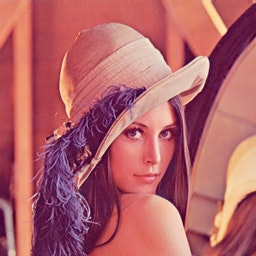

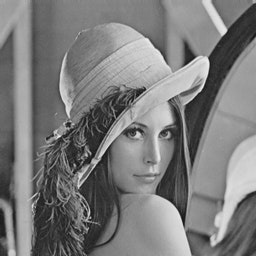

[[109 102  85  85]]
109


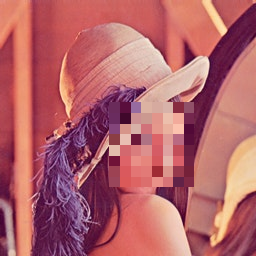

In [16]:
# OpenCV編課題
# モザイク関連のソース
## モザイクを作成する
def mosaic(src, ratio=0.1):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

## モザイクのエリアを指定する
def mosaic_area(img, x, y, width, height, ratio=0.1):
    dst = img.copy()
    dst[y:y + height, x:x + width] = mosaic(dst[y:y + height, x:x + width], ratio)
    return dst

## 課題のメソッド
def catch_pic_mosaic(path):
  img = cv2.imread(path)
  cv2_imshow(img) #モザイク処理前の出力

  #ToDo:追記し、メソッドを完成させよう
  # 分類器で検出できるよう、画像の色空間を変換する。
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  # 顔検出をする
  face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
  print(face)

  print(face[0][0])
  # 検出した領域に対してモザイク処理を行う
  dst_face = mosaic_area(img, face[0][0], face[0][1], face[0][2], face[0][3], 0.1)
  
  cv2_imshow(dst_face) #モザイク処理後の出力

# 実行用。「セルを実行」を押すとエラー無く下記のソースが動くこと。
catch_pic_mosaic(path)


## 3.手書き数字認識

### scikit-learnについて
* Pythonのオープンソース機械学習ライブラリ。  
 サポートベクターマシン、ランダムフォレスト、k近傍法、など様々な分類、回帰、クラスタリングアルゴリズムを備えている。

* 今回の研修では一例として、SVMを使用して分類モデルを作成するが、その他の詳細な使い方などに関しては、別途scikit-learnの演習資料を参考にすること。

### 手書き文字画像認識について
scikit-learnにはサンプルデータが複数準備されており、それを使用することで、ライブラリ内のメソッドやモデル作成に使用する手法についての学習が可能。  

今回の研修では、手書き文字画像のデータを使用する。

- 課題
 - 4-1. 手順に従って、手書き文字画像認識のモデルを作成してみよう

* データセットのロード

In [17]:
digits = datasets.load_digits()
#print(digits)


* 画像の形式やピクセル数に関しては、下記のセルを実行し、出力結果を参考にすること。

1797
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


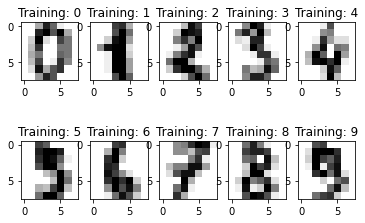

[ 0.  0.  2. 10.  7.  0.  0.  0.  0.  0. 14. 16. 16. 15.  1.  0.  0.  4.
 16.  7.  3. 16.  7.  0.  0.  5. 16. 10.  7. 16.  4.  0.  0.  0.  5. 14.
 14. 16.  4.  0.  0.  0.  0.  0.  0. 16.  2.  0.  0.  0.  4.  7.  7. 16.
  2.  0.  0.  0.  5. 12. 16. 12.  0.  0.]


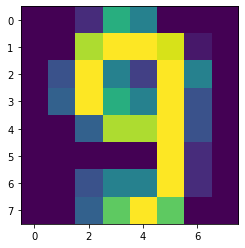

In [18]:
# データフォーマットの確認
n_samples = len(digits.data)
print(n_samples)
print(digits.data)
#画像を何枚か出力
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

plt.imshow(digits.images[1795])
print(digits.data[1795])
hogee = cv2
cv2_imshow(digits.images[1795])

* モデルを作成する  
 - 今回はSVMでモデルを作成するが、もし余裕があったらほかの手法でのモデル作成も実施してみよう。

In [19]:
# 解答欄（このセルに記載すること）
clf = svm.SVC(gamma=0.001, C=100.)
# ToDo:学習データを使用し、実際に学習をする
n_samples_train = int(n_samples * 6 / 10)
clf.fit(digits.data[:n_samples_train], digits.target[:n_samples_train])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

* 正解と予測結果を確認する
 - 下のセルを実行し、予測ができているかなどを確認すること。


In [26]:
print(digits.target[-10:]) # 正解ラベル
print(clf.predict(digits.data[-10:])) # 予測ラベル

# Predict the value of the digit on the last 40% data set:
expected = digits.target[n_samples * -4 // 10:] # 正解ラベル
predicted = clf.predict(digits.data[n_samples * -4 // 10:]) # 予測ラベル
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


[5 4 8 8 4 9 0 8 9 8]
[5 4 8 8 4 9 0 8 9 8]
Classification report for classifier SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.86      0.91        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.96      1.00      0.98        72
           8       0.92      1.00      0.96        68
           9       0.96      0.97      0.97        71

    accuracy                           0.97       719
   macro avg      

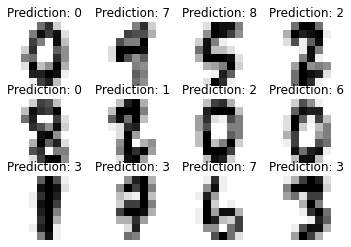

In [21]:
n_samples_test = int(n_samples * 4 / 10)
images_and_predictions = list(zip(digits.images[n_samples_test:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()  

* 作成したモデルを別途使用できるように保存する

In [22]:
with open('/content/kadaigazou/model/model.bin', mode='wb') as fp:
  pickle.dump(clf, fp)

In [23]:
!ls -l /content/kadaigazou/model
!date

total 336
-rw-r--r-- 1 root root 340300 Jul 29 09:21 model.bin
Wed Jul 29 09:21:46 UTC 2020


- 課題
  - 4-2. 4-1で作成したモデルを使用し、実際に自分で手書き数字の画像を準備し、認識させてみよう
   - 予測前の画像と予測結果を必ず出力させること。
   - 自前の画像が準備できない場合は研修フォルダにある画像を使用しても良い
   - 【ヒント】モデル作成時に使用した画像と解答用に準備した画像の形式を確認してみよう


In [193]:
# 使用するライブラリをインポートする
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import math
import pickle

In [194]:
class SVM():
    # 学習
    def train(self,
        save_trained_data_path,
        train_X,
        train_y,
        gamma,
        C,
        kernel):

        # 学習（SVM）
        clf = svm.SVC(gamma=gamma, C=C, kernel=kernel)
        clf.fit(train_X, train_y)
        joblib.dump(clf, save_trained_data_path)

    # 検証
    def test(self,
        load_trained_data_path,
        test_X,
        test_y):

        # 学習済ファイルのロード
        clf = joblib.load(load_trained_data_path)

        # 学習結果の検証（テスト用データx1, x2を入力）
        predicted_y = clf.predict(test_X)

        # 正解データと予測データを比較し、スコアを計算
        score = metrics.accuracy_score(test_y, predicted_y)

        # 検証結果の表示
        print("Score：", score)

    # 予測
    def predict(self,
        load_trained_data_path,
        test_X):
        # 学習済ファイルのロード
        clf = joblib.load(load_trained_data_path)

        # モデルに入力し、予測値を計算
        predicted_y = clf.predict(test_X)
        
        return predicted_y

In [195]:
# 学習済みモデルデータの出力先パス
SAVE_TRAINED_DATA_PATH = '/content/kadaigazou/model/model.learn'

def main():
    # SVMのパラメータ
    GAMMA = 0.1
    C = 1
    KERNEL = "linear" # 手書き数字画像の場合はrbfだと学習結果が悪い

    # 学習用のデータを読み込み(Digitsデータセットを利用)
    digits_dataset = datasets.load_digits()

    # 説明変数（学習データ：手書き数字の画像データ8*8, 2次元配列）を抽出
    X = digits_dataset.images

    print("X1:", X[1])
    
    # 目的変数：数字（0～9）
    y = digits_dataset.target
    
    # xの二次元配列を１次元に変換(-1で変換元の要素数に合わせて自動で値が決定：変換前要素数=変換後要素数となる）
    X = X.reshape((-1, 64))
    
    # 説明変数のデータを、学習用データと検証用データに分割(学習用90%、検証用10％、シャッフルする)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)
    print("train_X size:", train_X.shape)
    print("train_y size:", train_y.shape)
    print("test_X size:", test_X.shape)
    print("test_y size:", test_y.shape)

    # 学習済みモデルの作成
    svm = SVM()
    svm.train(save_trained_data_path = SAVE_TRAINED_DATA_PATH,
            train_X=train_X,
            train_y=train_y,
            gamma = GAMMA,
            C = C,
            kernel = KERNEL)

    # 学習済みモデルの検証
    svm.test(
        load_trained_data_path = SAVE_TRAINED_DATA_PATH,
        test_X=test_X,
        test_y=test_y)
    
if __name__ == "__main__":
    main()

X1: [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
train_X size: (1437, 64)
train_y size: (1437,)
test_X size: (360, 64)
test_y size: (360,)
Score： 0.9861111111111112


In [198]:
import numpy
numpy.set_printoptions(threshold=numpy.inf)

def predict_y(load_test_img_path):
    # 学習済みモデルを使って予測
    # テスト用の画像データ
    LOAD_TEST_IMG_PATH = load_test_img_path

    # Opencvでロード
    test_img = cv2.imread(LOAD_TEST_IMG_PATH)
    # サイズ変更
    test_img = cv2.resize(test_img , (int(test_img.shape[1] * 0.08), int(test_img.shape[0] * 0.04)))
    #cv2_imshow(test_img)
    #print("サイズ変更:\n", test_img)

    # グレースケール変換
    test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(test_gray)
    #print("グレースケール変換:\n", test_gray)

    # 白黒反転
    test_reverse = cv2.bitwise_not(test_gray)
    test_reverse = test_reverse.astype(np.float32)
    #cv2_imshow(test_reverse)
    #print("白黒反転:\n", test_reverse)

    # 二値化
    retval, test_binary = cv2.threshold(test_reverse, 100, 255, cv2.THRESH_BINARY)
    #cv2_imshow(test_binary)
    #print("二値化:\n", test_binary)

    # 膨張
    kernel = np.ones((8, 8), np.uint8)
    test_expanse = cv2.dilate(test_binary, kernel, iterations = 1)
    cv2_imshow(test_expanse)
    #print("膨張:\n", test_expanse)

    # 8*8にリサイズ
    test_resize = cv2.resize(test_expanse, (8, 8), cv2.INTER_CUBIC)
    #cv2_imshow(test_resize)
    #print("8*8にリサイズ:\n", test_resize)

    # 1次元配列に変換
    test_1dimention = test_resize.reshape(-1, 64)
    #print("1次元配列に変換:\n", test_1dimention)

    # 並べて表示
    #imgs = cv2.hconcat([test_gray, test_expanse])
    #cv2_imshow(imgs)

    svm = SVM()
    predict_y = svm.predict(
        load_trained_data_path = SAVE_TRAINED_DATA_PATH,
        test_X=test_1dimention)

    #print("test_X:", test_1dimention)
    print("predict_y:", predict_y)

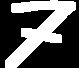

predict_y: [7]


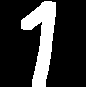

predict_y: [2]


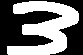

predict_y: [3]


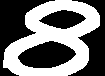

predict_y: [3]


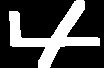

predict_y: [4]


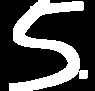

predict_y: [5]


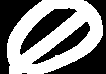

predict_y: [3]


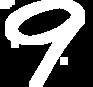

predict_y: [9]


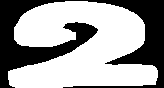

predict_y: [2]


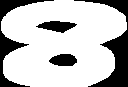

predict_y: [3]


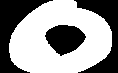

predict_y: [0]


In [200]:
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img1.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img2.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img3.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img4.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img5.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img6.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img7.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img8.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img9.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img10.jpg')
predict_y(load_test_img_path = 'gdrive/My Drive/Colab Notebooks/data/sample_img11.jpg')